# Thème : Analyse de l'impact du COVID 19 sur les salaires (pôle emplois) affichés par les entreprises

# Introduction

Ce projet utilise les données issues de <a href = "https://www.emploi-store-dev.fr/portail-developpeur-cms/home/catalogue-des-api/documentation-des-api/api/api-offres-demploi-v2.html">l'API Offres Emploi V2 </a> disponible sur <a href = "https://www.emploi-store.fr/portail/accueil"> Emploi Store </a> de Pôle Emploi.

# 1 Chargement du jeu de données

## 1.1 Installation du module permettant de se connecter à l'API Offres Emploi V2

In [2]:
import sys
!{sys.executable} -m pip install api-offres-emploi

## 1.2 Connexion à l'API avec ses identifiants

Pour avoir accès aux données, il faut s'abonner à l'API Offres Emploi V2 en suivant les étapes suivantes : 


* Créer un compte personnel sur <a href = "https://www.emploi-store.fr/portail/accueil"> Emploi Store </a> de Pôle Emploi ;
* Se rendre sur son tableau de bord et créer une application ; 
* Il est alors possible de rémarquer la mise à disposition d'un Identifiant + de la clé sécrète ;
* Se rendre sur <a href = "https://www.emploi-store-dev.fr/portail-developpeur/catalogueapi"> le catalogue des API de Emploi Store </a> puis connecter l'API Offres emplois V2 à l'application précédemment créée. 


Pour ce travail, nous utiliserons nos identifiants personnels, créés dans l'optique de développement de ce projet, afin de nous connecter à l'API Offre Emploi V2.

Identifiant = <b>PAR_projetpythonensaeparis_5057178a7383440d43d281143f1dd0b2b62722b1f769fa112143a621f0fa83c8</b>

Clé sécrète = <b>6a385e8bef5e30587cb23157a486e153ab7e98d3d3382ce92570efc03582f4b4</b>

In [3]:
from offres_emploi import Api
client = Api(client_id="PAR_projetpythonensaeparis_5057178a7383440d43d281143f1dd0b2b62722b1f769fa112143a621f0fa83c8", 
             client_secret="6a385e8bef5e30587cb23157a486e153ab7e98d3d3382ce92570efc03582f4b4")

In [4]:
# récupération des données
from offres_emploi.utils import dt_to_str_iso
import datetime

start_dt = datetime.datetime(2019, 6, 1)
end_dt = datetime.datetime(2020, 12, 1)
params = {
    #'range' : "0-149",
    'minCreationDate': dt_to_str_iso(start_dt),
    'maxCreationDate': dt_to_str_iso(end_dt)
}
search_covid = client.search(params=params)

Making request with params {'minCreationDate': '2019-06-01T00:00:00Z', 'maxCreationDate': '2020-12-01T00:00:00Z'}
Token has not been requested yet. Requesting token
Now requesting token


In [5]:
search_covid["Content-Range"]

{'first_index': '0', 'last_index': '149', 'max_results': '142191'}

In [6]:
search_covid

{'filtresPossibles': [{'agregation': [{'nbResultats': 1362,
     'valeurPossible': 'CCE'},
    {'nbResultats': 29441, 'valeurPossible': 'CDD'},
    {'nbResultats': 71585, 'valeurPossible': 'CDI'},
    {'nbResultats': 53, 'valeurPossible': 'CDS'},
    {'nbResultats': 161, 'valeurPossible': 'DDI'},
    {'nbResultats': 109, 'valeurPossible': 'DIN'},
    {'nbResultats': 1767, 'valeurPossible': 'FRA'},
    {'nbResultats': 3373, 'valeurPossible': 'LIB'},
    {'nbResultats': 33481, 'valeurPossible': 'MIS'},
    {'nbResultats': 16, 'valeurPossible': 'REP'},
    {'nbResultats': 772, 'valeurPossible': 'SAI'},
    {'nbResultats': 71, 'valeurPossible': 'TTI'}],
   'filtre': 'typeContrat'},
  {'agregation': [{'nbResultats': 18348, 'valeurPossible': '0'},
    {'nbResultats': 61252, 'valeurPossible': '1'},
    {'nbResultats': 52142, 'valeurPossible': '2'},
    {'nbResultats': 10449, 'valeurPossible': '3'}],
   'filtre': 'experience'},
  {'agregation': [{'nbResultats': 85282, 'valeurPossible': '0'},
 

In [7]:
search_covid.keys()

dict_keys(['filtresPossibles', 'resultats', 'Content-Range'])

In [8]:
search_covid["filtresPossibles"]

[{'agregation': [{'nbResultats': 1362, 'valeurPossible': 'CCE'},
   {'nbResultats': 29441, 'valeurPossible': 'CDD'},
   {'nbResultats': 71585, 'valeurPossible': 'CDI'},
   {'nbResultats': 53, 'valeurPossible': 'CDS'},
   {'nbResultats': 161, 'valeurPossible': 'DDI'},
   {'nbResultats': 109, 'valeurPossible': 'DIN'},
   {'nbResultats': 1767, 'valeurPossible': 'FRA'},
   {'nbResultats': 3373, 'valeurPossible': 'LIB'},
   {'nbResultats': 33481, 'valeurPossible': 'MIS'},
   {'nbResultats': 16, 'valeurPossible': 'REP'},
   {'nbResultats': 772, 'valeurPossible': 'SAI'},
   {'nbResultats': 71, 'valeurPossible': 'TTI'}],
  'filtre': 'typeContrat'},
 {'agregation': [{'nbResultats': 18348, 'valeurPossible': '0'},
   {'nbResultats': 61252, 'valeurPossible': '1'},
   {'nbResultats': 52142, 'valeurPossible': '2'},
   {'nbResultats': 10449, 'valeurPossible': '3'}],
  'filtre': 'experience'},
 {'agregation': [{'nbResultats': 85282, 'valeurPossible': '0'},
   {'nbResultats': 9103, 'valeurPossible': '9

In [9]:
search_covid["resultats"]

[{'accessibleTH': False,
  'alternance': True,
  'appellationlibelle': 'Développeur / Développeuse web',
  'competences': [{'code': '121398',
    'exigence': 'S',
    'libelle': 'Analyser des problèmes techniques'},
   {'code': '118637',
    'exigence': 'S',
    'libelle': 'Analyser les besoins du client'},
   {'code': '109846',
    'exigence': 'S',
    'libelle': 'Concevoir et développer les programmes et applications informatiques'},
   {'code': '121055',
    'exigence': 'S',
    'libelle': 'Déterminer des mesures correctives'},
   {'code': '117309',
    'exigence': 'S',
    'libelle': 'Établir un cahier des charges'}],
  'contact': {'coordonnees1': 'https://recrutonsensemble.com/offers/602/show/35dec1cd-91b0-47b7-b4ff-8306cfd9260f',
   'nom': '3WRH - M. Didier RABAUD',
   'urlPostulation': 'https://recrutonsensemble.com/offers/602/show/35dec1cd-91b0-47b7-b4ff-8306cfd9260f'},
  'dateActualisation': '2020-12-01T00:00:00+01:00',
  'dateCreation': '2020-11-30T23:59:06+01:00',
  'descrip

In [10]:
search_covid["Content-Range"]

{'first_index': '0', 'last_index': '149', 'max_results': '142191'}

In [11]:
filtres = search_covid['filtresPossibles']
resultats =  search_covid['resultats']
plage = search_covid['Content-Range']

In [12]:
from offres_emploi.utils import filters_to_df
filtres_df = filters_to_df(filtres)

In [13]:
filtres_df

,filtre,valeur_possible,nb_resultats
0,typeContrat,CCE,1362
1,typeContrat,CDD,29441
2,typeContrat,CDI,71585
3,typeContrat,CDS,53
4,typeContrat,DDI,161
5,typeContrat,DIN,109
6,typeContrat,FRA,1767
7,typeContrat,LIB,3373
8,typeContrat,MIS,33481
9,typeContrat,REP,16


<AxesSubplot:xlabel='nb_resultats', ylabel='valeur_possible'>

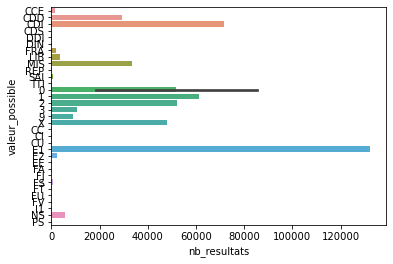

In [14]:
import seaborn as sns
sns.barplot(data = filtres_df, y = "valeur_possible", x = "nb_resultats")

In [15]:
import pandas as pd
resultats_df = pd.DataFrame(resultats)
salary_by_enterprise = (
 resultats_df[['id','entreprise', 'salaire']]
 .dropna()
 .agg(dict(entreprise=lambda x: x.get('nom'),
           salaire=lambda x: x.get('commentaire')))
 .dropna(subset=["salaire"])
 .loc[lambda df: df.salaire.str.contains("\d+")]
 .sort_values("salaire")
)

In [16]:
resultats_df.columns

Index(['accessibleTH', 'alternance', 'appellationlibelle', 'competences',
       'contact', 'dateActualisation', 'dateCreation', 'description',
       'dureeTravailLibelle', 'dureeTravailLibelleConverti', 'entreprise',
       'experienceExige', 'experienceLibelle', 'formations', 'id', 'intitule',
       'langues', 'lieuTravail', 'natureContrat', 'nombrePostes',
       'origineOffre', 'qualificationCode', 'qualificationLibelle',
       'qualitesProfessionnelles', 'romeCode', 'romeLibelle', 'salaire',
       'secteurActivite', 'secteurActiviteLibelle', 'trancheEffectifEtab',
       'typeContrat', 'typeContratLibelle', 'deplacementCode',
       'deplacementLibelle', 'permis', 'agence', 'conditionExercice',
       'experienceCommentaire'],
      dtype='object')

In [17]:
resultats

[{'accessibleTH': False,
  'alternance': True,
  'appellationlibelle': 'Développeur / Développeuse web',
  'competences': [{'code': '121398',
    'exigence': 'S',
    'libelle': 'Analyser des problèmes techniques'},
   {'code': '118637',
    'exigence': 'S',
    'libelle': 'Analyser les besoins du client'},
   {'code': '109846',
    'exigence': 'S',
    'libelle': 'Concevoir et développer les programmes et applications informatiques'},
   {'code': '121055',
    'exigence': 'S',
    'libelle': 'Déterminer des mesures correctives'},
   {'code': '117309',
    'exigence': 'S',
    'libelle': 'Établir un cahier des charges'}],
  'contact': {'coordonnees1': 'https://recrutonsensemble.com/offers/602/show/35dec1cd-91b0-47b7-b4ff-8306cfd9260f',
   'nom': '3WRH - M. Didier RABAUD',
   'urlPostulation': 'https://recrutonsensemble.com/offers/602/show/35dec1cd-91b0-47b7-b4ff-8306cfd9260f'},
  'dateActualisation': '2020-12-01T00:00:00+01:00',
  'dateCreation': '2020-11-30T23:59:06+01:00',
  'descrip

# 2. Traitement des données

In [18]:
salary_by_enterprise

,entreprise,salaire
5,RAS 580,+prime de 13ème mois/h + indemnité d
63,DERICHEBOURG PROPRETE (INDUSTRIE),"10,44"
118,CLINITEX PICARDIE,"12,04"
24,HOTEL FAST,1500 net mensuel
11,ANIMATION COMMERCIALE ET SPECTACLES,160 € NET PAR JOUR
136,SCA ANIM,90 /JOUR
130,IMMO DE LA METROPOLE BORDELAISE,Fixe = 1300brut + Avance sur com
49,HIOLLE TECHNOLOGIES,SELON EXP2RIENCE
20,HASINVEST 93 Bd Robespierre POISSY,Salaire 1700 et 2000 euros net
72,ANTILLES RECRUTEMENT,de1800 à 2500 Brut


# 3. Statistique descriptive

# 4. Visualisation

# 5. Modélisation

# Conclusion